<h1>Can you Classify what STD a person has<h1>

<h4>Introduction<h4>


This is the final project for CMSC320 for Sreedatta Kaligotla that aims to analysise STD rates in America and to also then make a classifier that would predict what STD a person has given the input from the Dataset.



<h4>Background<h4>


Sexually transmitted diseases (STDs) are a significant public health problem in the United States. According to the Centers for Disease Control and Prevention (CDC), there are approximately 20 million new cases of STDs each year, costing the U.S. healthcare system billions of dollars in treatment and prevention efforts.

STDs can have serious health consequences if left untreated, including infertility, cancer, and organ damage. STDs are also associated with an increased risk of HIV transmission. In addition to the health consequences, STDs can also have significant social and economic impacts, as they may lead to stigma, discrimination, and lost productivity.

Analysis of STD data can help to prevent the spread of STDs by pinpointing locations with high rates of infection and targeting prevention efforts to these areas. Data analysis can also help to identify trends in STD rates over time and among different populations, which can inform the development of targeted prevention strategies.

Machine learning and data science can play a role in the prevention of STDs by helping to analyze large and complex data sets, identify patterns and trends, and predict future outcomes. For example, machine learning algorithms could be used to analyze data and identify individuals at high risk of contracting STDs, enabling targeted prevention efforts. Data science techniques could also be used to develop and evaluate the effectiveness of interventions aimed at reducing STD rates.

Overall, the analysis of STD data and the use of machine learning and data science techniques have the potential to play a significant role in the prevention of STDs in the United States and elsewhere. By identifying patterns and trends in STD rates and targeting prevention efforts accordingly, it is possible to reduce the burden of STDs on public health and improve the overall well-being of affected populations.

<h4>Data<h4>


The dataset used for this project contains data on sexually transmitted disease (STD) infection rates in the United States from 1996 to 2008. The data was collected by the Centers for Disease Control and Prevention (CDC) and includes information on the number of cases of each STD, the rate of infection per 100,000 population, and demographic characteristics of the affected individuals such as age, gender, and race.

The dataset includes data on four different STDs: chlamydia, gonorrhea, primary and secondary syphilis, and HIV/AIDS. It is organized by year, state, and disease, with separate records for each combination of year, state, and disease.

The data is presented in a tabular format, with each row representing a unique combination of year, state, and disease and each column representing a different variable such as the number of cases, the rate of infection per 100,000 population, and demographic characteristics.

Overall, this dataset provides valuable insights into the prevalence and distribution of STDs in the United States over a 13-year period, and could be used to inform public health efforts to prevent the spread of STDs and provide care to those affected. It may be of particular interest to researchers and public health professionals working on issues related to sexual health and disease prevention.

Lets start by importing the necessary libaries for this project. Some of the important libraries used for this project are seaborn, sklearn and pandas. 

These three libraries are commonly used together in data science workflows in Python. Seaborn is used for data visualization, sklearn for machine learning, and pandas for data manipulation and preparation. They are all open-source and have strong communities of users and developers, which makes them well-supported and constantly improving. They will help us visualize the data and draw conclusions and make further predictions.

Here is the link to the repo, use this to pull the dataset. The index.html and the std_cases.csv is in there: https://github.com/DattaKaligotlaBackup/DattaKaligotlaBackup.github.io

In [30]:
#import necessary packages
import re
import time
import json
import requests
import zlib
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse as urllib
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import os


In [31]:
#import the dataset via CSV format
std = pd.read_csv("std_cases.csv", index_col= 0)
std.head()

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
index,,,,,,,,,,
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


<h4>Datapreprocessing/Cleaning<h4>

Data preprocessing and cleaning are essential steps in the data science process because they allow you to prepare your data for analysis and modeling. Raw data is often messy and incomplete, and may contain errors, inconsistencies, and outliers that can compromise the accuracy and reliability of your results. Therefore, it is important to clean and process your data to make it suitable for analysis.
In out dataset there are a lot of NaN values or values that ae empty. They could have been empty for a plethora of reasons, whether or not they were recorded is one of them. It is important to get rid of rows with NaN values as it could mess up our stastical results and cause errors

In [32]:
print(std.info)

<bound method DataFrame.info of          Disease  Disease Code    State    Year Gender          Age Age Code  \
index                                                                          
0      Chlamydia         274.0  Alabama  1996.0   Male   0-14 years     0-14   
1      Chlamydia         274.0  Alabama  1996.0   Male  15-19 years    15-19   
2      Chlamydia         274.0  Alabama  1996.0   Male  20-24 years    20-24   
3      Chlamydia         274.0  Alabama  1996.0   Male  25-29 years    25-29   
4      Chlamydia         274.0  Alabama  1996.0   Male  30-34 years    30-34   
...          ...           ...      ...     ...    ...          ...      ...   
42675        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42676        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42677        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42678        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42679   

Here we can see the rows where some columns have NaN values

In [33]:
std.isna

<bound method DataFrame.isna of          Disease  Disease Code    State    Year Gender          Age Age Code  \
index                                                                          
0      Chlamydia         274.0  Alabama  1996.0   Male   0-14 years     0-14   
1      Chlamydia         274.0  Alabama  1996.0   Male  15-19 years    15-19   
2      Chlamydia         274.0  Alabama  1996.0   Male  20-24 years    20-24   
3      Chlamydia         274.0  Alabama  1996.0   Male  25-29 years    25-29   
4      Chlamydia         274.0  Alabama  1996.0   Male  30-34 years    30-34   
...          ...           ...      ...     ...    ...          ...      ...   
42675        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42676        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42677        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42678        NaN           NaN      NaN     NaN    NaN          NaN      NaN   
42679   

Let's drop the rows with NaN values

In [34]:
std.dropna(inplace = True)
print(std.info)

<bound method DataFrame.info of                               Disease  Disease Code    State    Year  Gender  \
index                                                                          
0                           Chlamydia         274.0  Alabama  1996.0    Male   
1                           Chlamydia         274.0  Alabama  1996.0    Male   
2                           Chlamydia         274.0  Alabama  1996.0    Male   
3                           Chlamydia         274.0  Alabama  1996.0    Male   
4                           Chlamydia         274.0  Alabama  1996.0    Male   
...                               ...           ...      ...     ...     ...   
42625  Primary and Secondary Syphilis         310.0  Wyoming  2004.0  Female   
42626  Primary and Secondary Syphilis         310.0  Wyoming  2007.0  Female   
42627  Primary and Secondary Syphilis         310.0  Wyoming  2008.0  Female   
42628  Primary and Secondary Syphilis         310.0  Wyoming  2008.0  Female   
42629  P

In [35]:
std.head(500)

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
index,,,,,,,,,,
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29
...,...,...,...,...,...,...,...,...,...,...
529,Chlamydia,274.0,Arkansas,2009.0,Male,35-39 years,35-39,117.0,91511.0,127.85
530,Chlamydia,274.0,Arkansas,2009.0,Male,40+ years,40+,116.0,625422.0,18.55
532,Chlamydia,274.0,Arkansas,2010.0,Male,0-14 years,0-14,18.0,302717.0,5.95


Now we got rid of the Rows with the NaN values

Now lets get array Dataframe values of the columns, so we can manipulate the data further

In [36]:
#Setting the Variables
States = std["State"]
Diseases = std["Disease"]
Disease_Code = std["Disease Code"]
Year = std["Year"]
Gender = std["Gender"]
Age = std["Age"]
Age_Code = std["Age Code"]
Std_Cases = std["STD Cases"]
Population = std["Population"]
Rate_100k = std["Rate per 100K"]


Lets see if the relationship between STD Cases and State matters. Based on this graph, we can see that there is a correlation between STD cases and the State. Keep in mind however, some States, like Texas and California have a lot more people than states like Vermont and Kansas

Text(0.5, 1.0, 'STD Cases vs State')

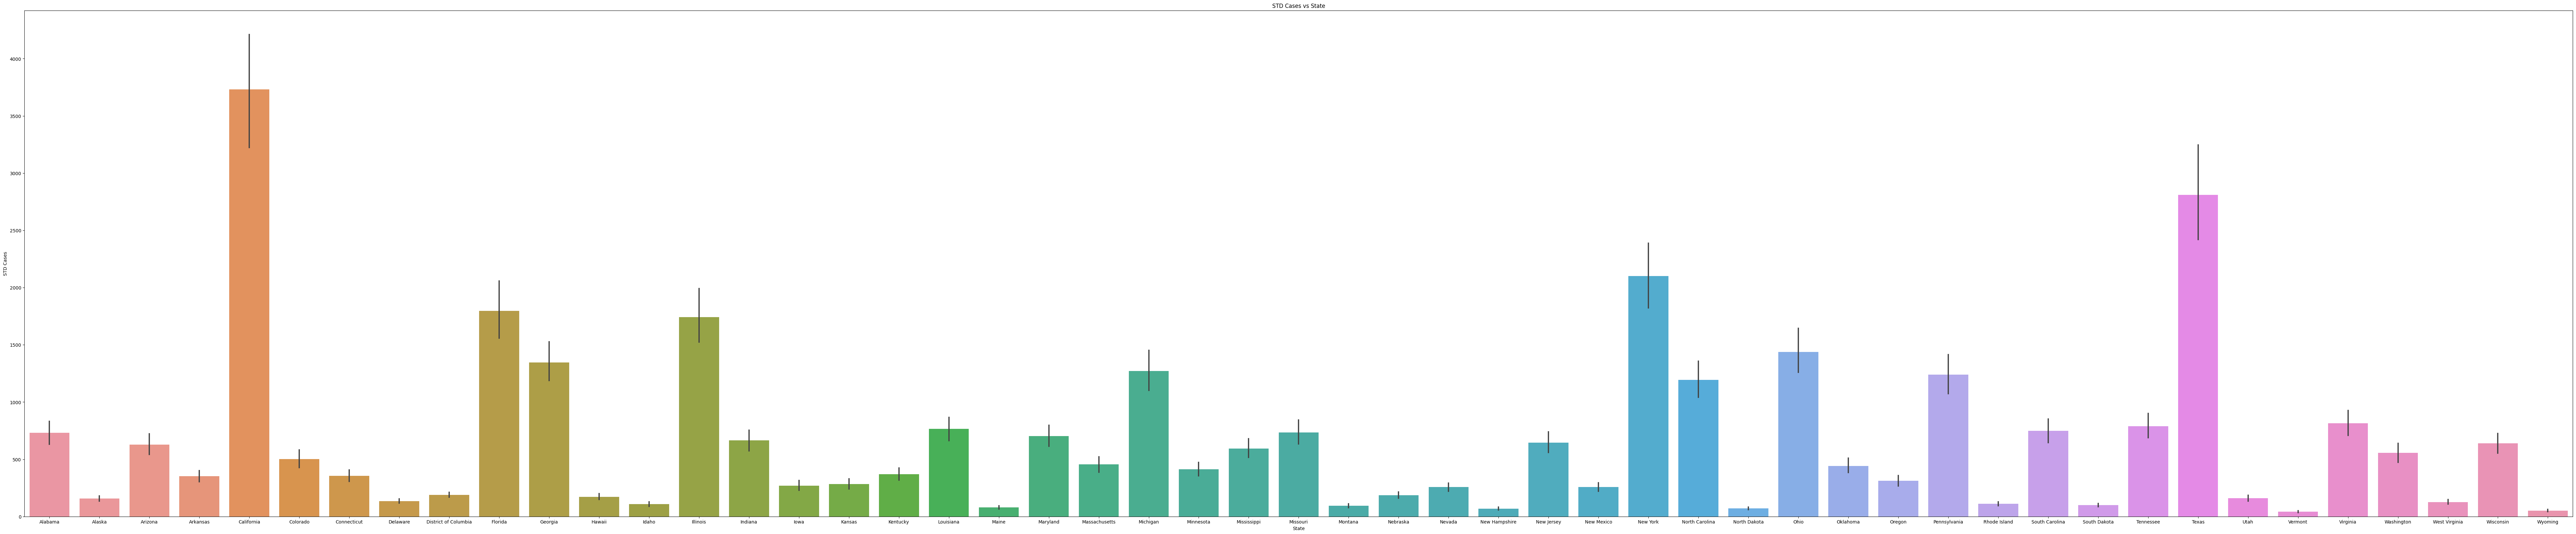

In [37]:

plt.figure(figsize = (100, 20))
sns.barplot(y = Std_Cases, x = States, data = std)
plt.title("STD Cases vs State")


This Gives us just the total amount of people diagnosed with STD, but not the rate. The rate would be more of an indication between STD and State as population would be thrown out as secondary vector. Lets run with the Rate per 100k variable and see the relationship.

Lets first Start by manipulating some data. We need to easily graph the Data in a way that we can easily see it and not in a graph with 50 other states. Let us order and sort the States together to make this process easier, save time and make more presentable data. The code below accomplishes that.

In [38]:
StateListUnique = list(States)
StateListUnique = sorted([*set(StateListUnique)])
print(StateListUnique)


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [39]:
std = std.sort_values(by=['State'])

In [40]:
std.head(500)

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
index,,,,,,,,,,
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
23950,Chlamydia,274.0,Alabama,1998.0,Female,35-39 years,35-39,109.0,175869.0,61.98
23951,Chlamydia,274.0,Alabama,1998.0,Female,40+ years,40+,232.0,1025742.0,22.62
23952,Chlamydia,274.0,Alabama,1999.0,Female,0-14 years,0-14,326.0,452586.0,72.03
23953,Chlamydia,274.0,Alabama,1999.0,Female,15-19 years,15-19,4972.0,161690.0,3075.02
...,...,...,...,...,...,...,...,...,...,...
31567,Gonorrhea,280.0,Alabama,2011.0,Female,35-39 years,35-39,86.0,151554.0,56.75
31568,Gonorrhea,280.0,Alabama,2011.0,Female,40+ years,40+,91.0,1216531.0,7.48
31570,Gonorrhea,280.0,Alabama,2012.0,Female,0-14 years,0-14,91.0,457018.0,19.91


This allows us to get the index of states easily to better represent the graphs and make it more presentable

In [41]:

States = std["State"]
Diseases = std["Disease"]
Disease_Code = std["Disease Code"]
Year = std["Year"]
Gender = std["Gender"]
Age = std["Age"]
Age_Code = std["Age Code"]
Std_Cases = std["STD Cases"]
Population = std["Population"]
Rate_100k = std["Rate per 100K"]
StateList = list(States)

print(str(StateList.index("Georgia")) + "Florida")
print(str(StateList.index("Maryland")) + "Maine")
print(str(StateList.index("New Jersey")) + "New Hampshire")
print(str(StateList.index("South Carolina")) + "Rhode Island")
print(len(StateList))



7183Florida
14125Maine
21044New Hampshire
28174Rhode Island
35483


Now lets seperate the States and graph the STD rates vs the States to see the relationship that States provide in STD rates

Text(0.5, 1.0, 'STD Cases vs States(Alabama - Florida')

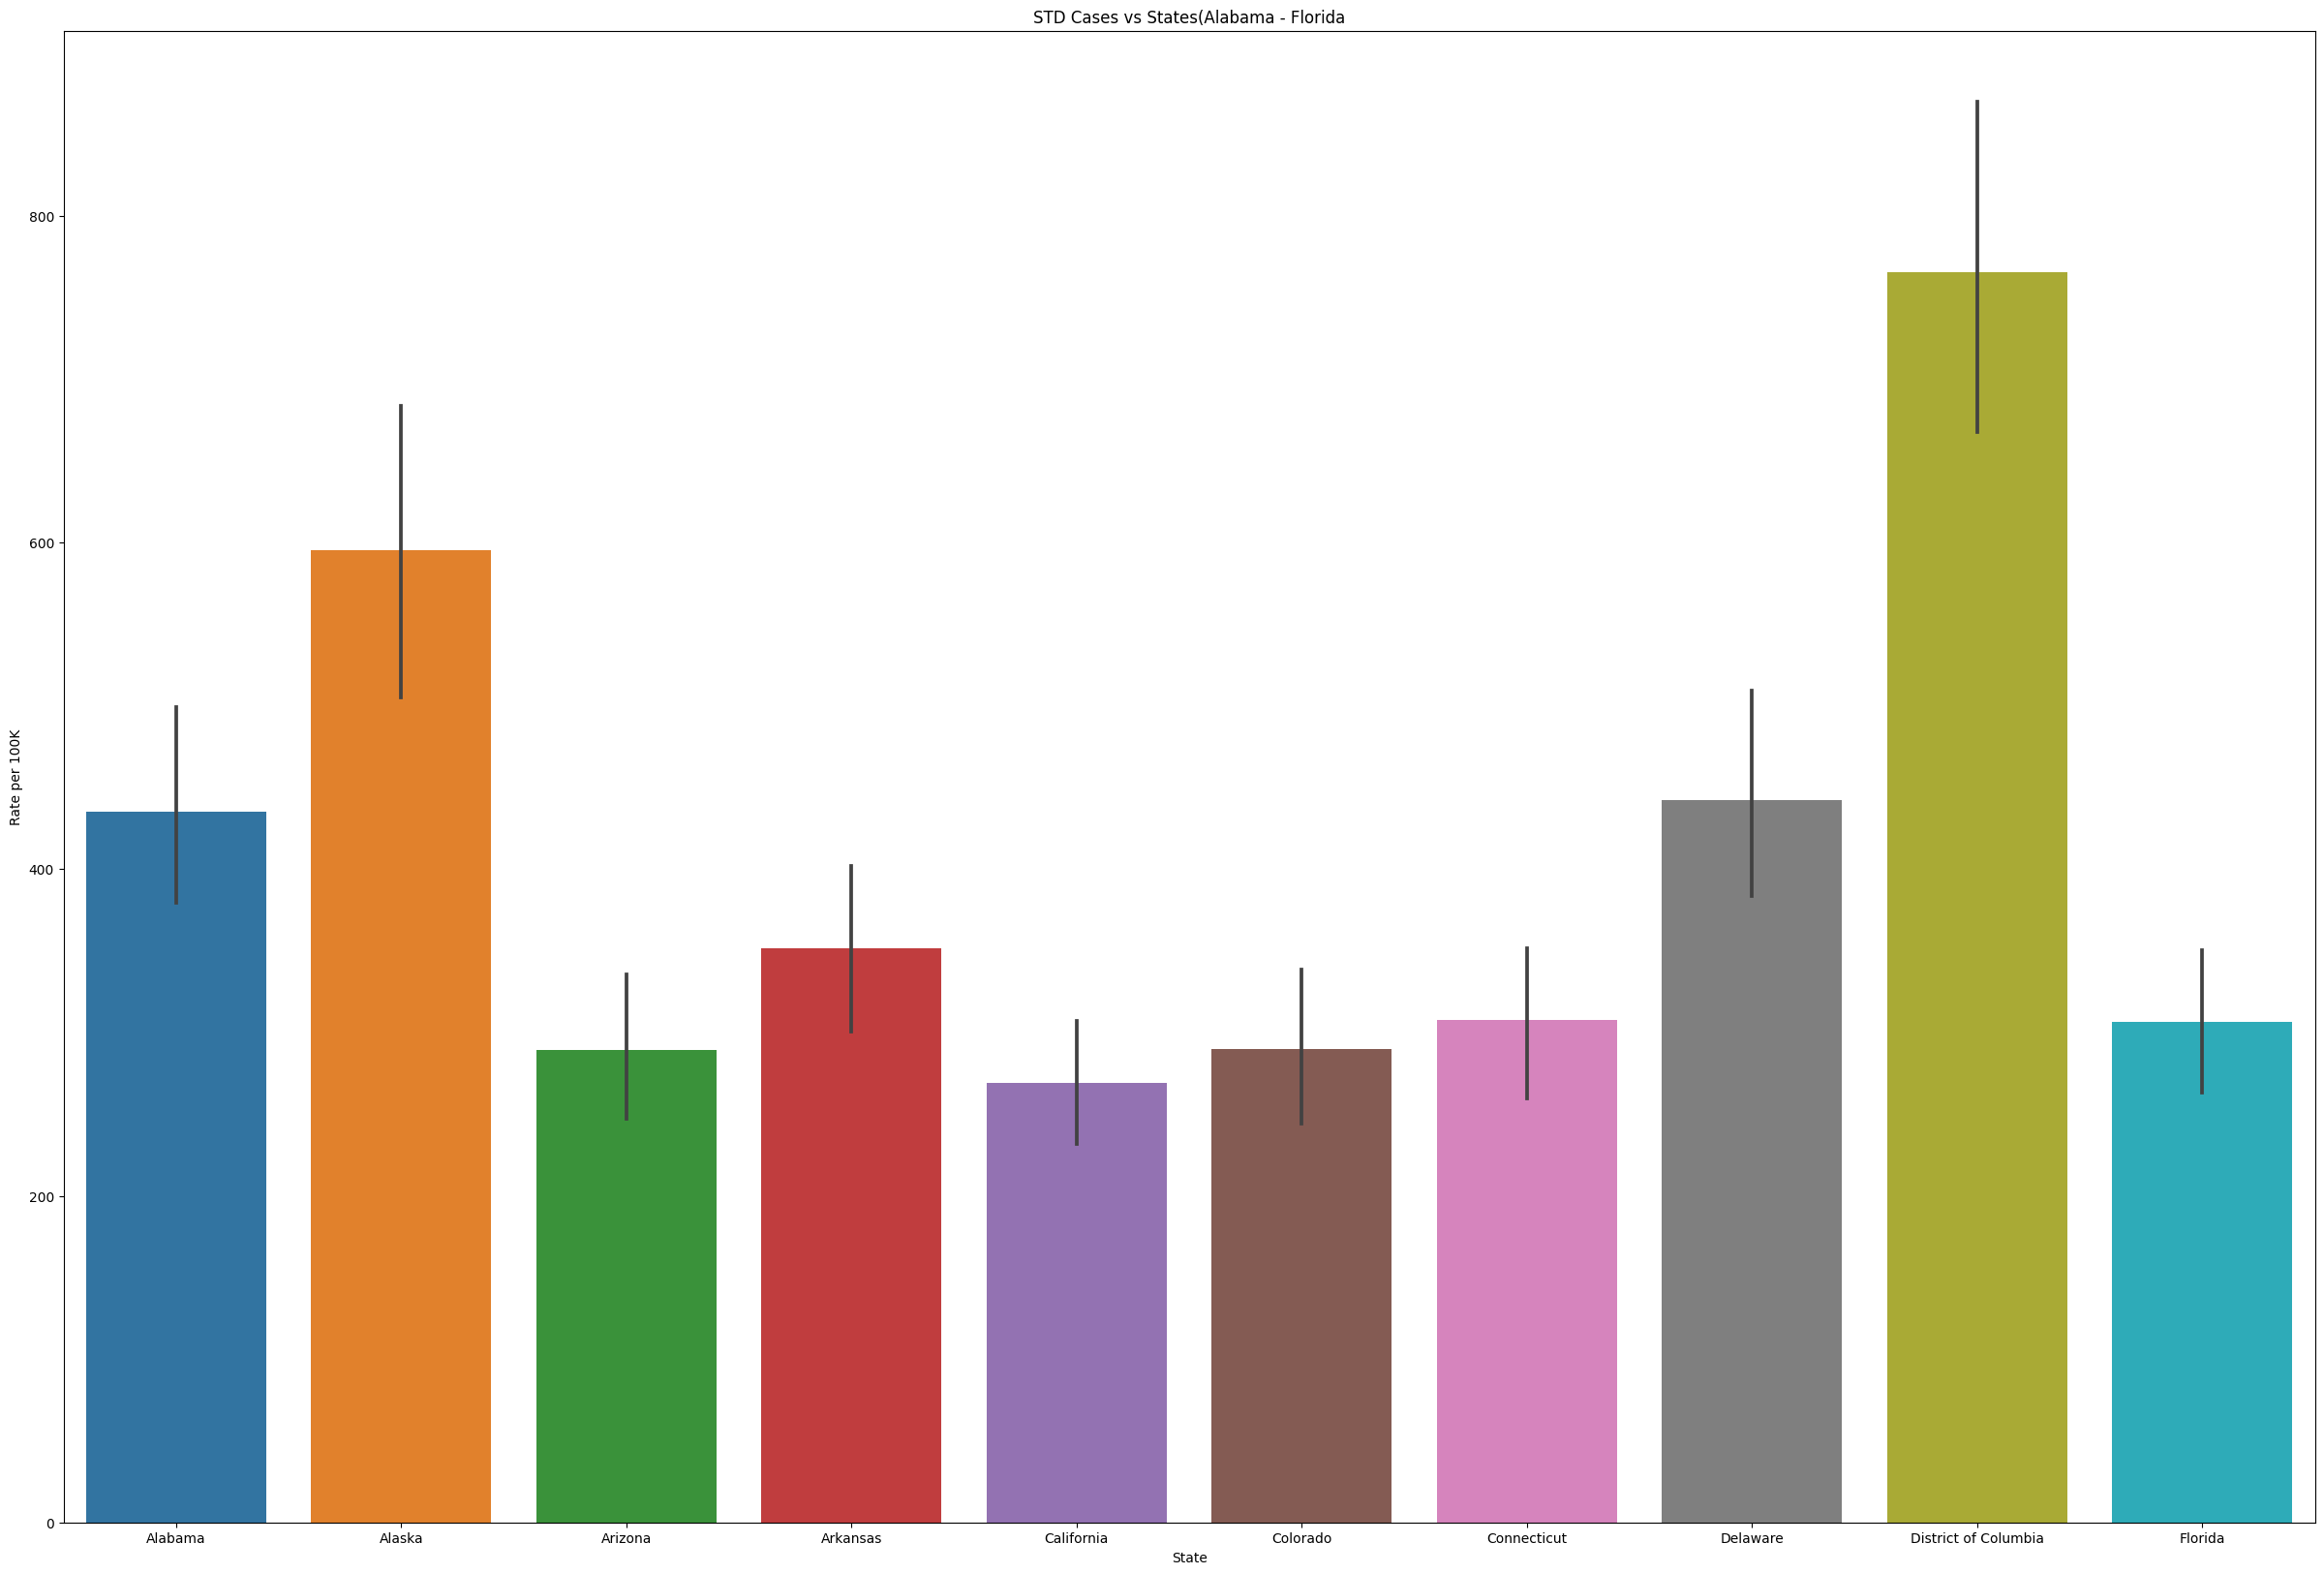

In [42]:
plt.figure(figsize = (30, 20))
one = sns.barplot(y = Rate_100k, x = States[0:7183], data = std)
plt.title("STD Cases vs States(Alabama - Florida")


Text(0.5, 1.0, 'STD Cases vs States(Georgia - Maine')

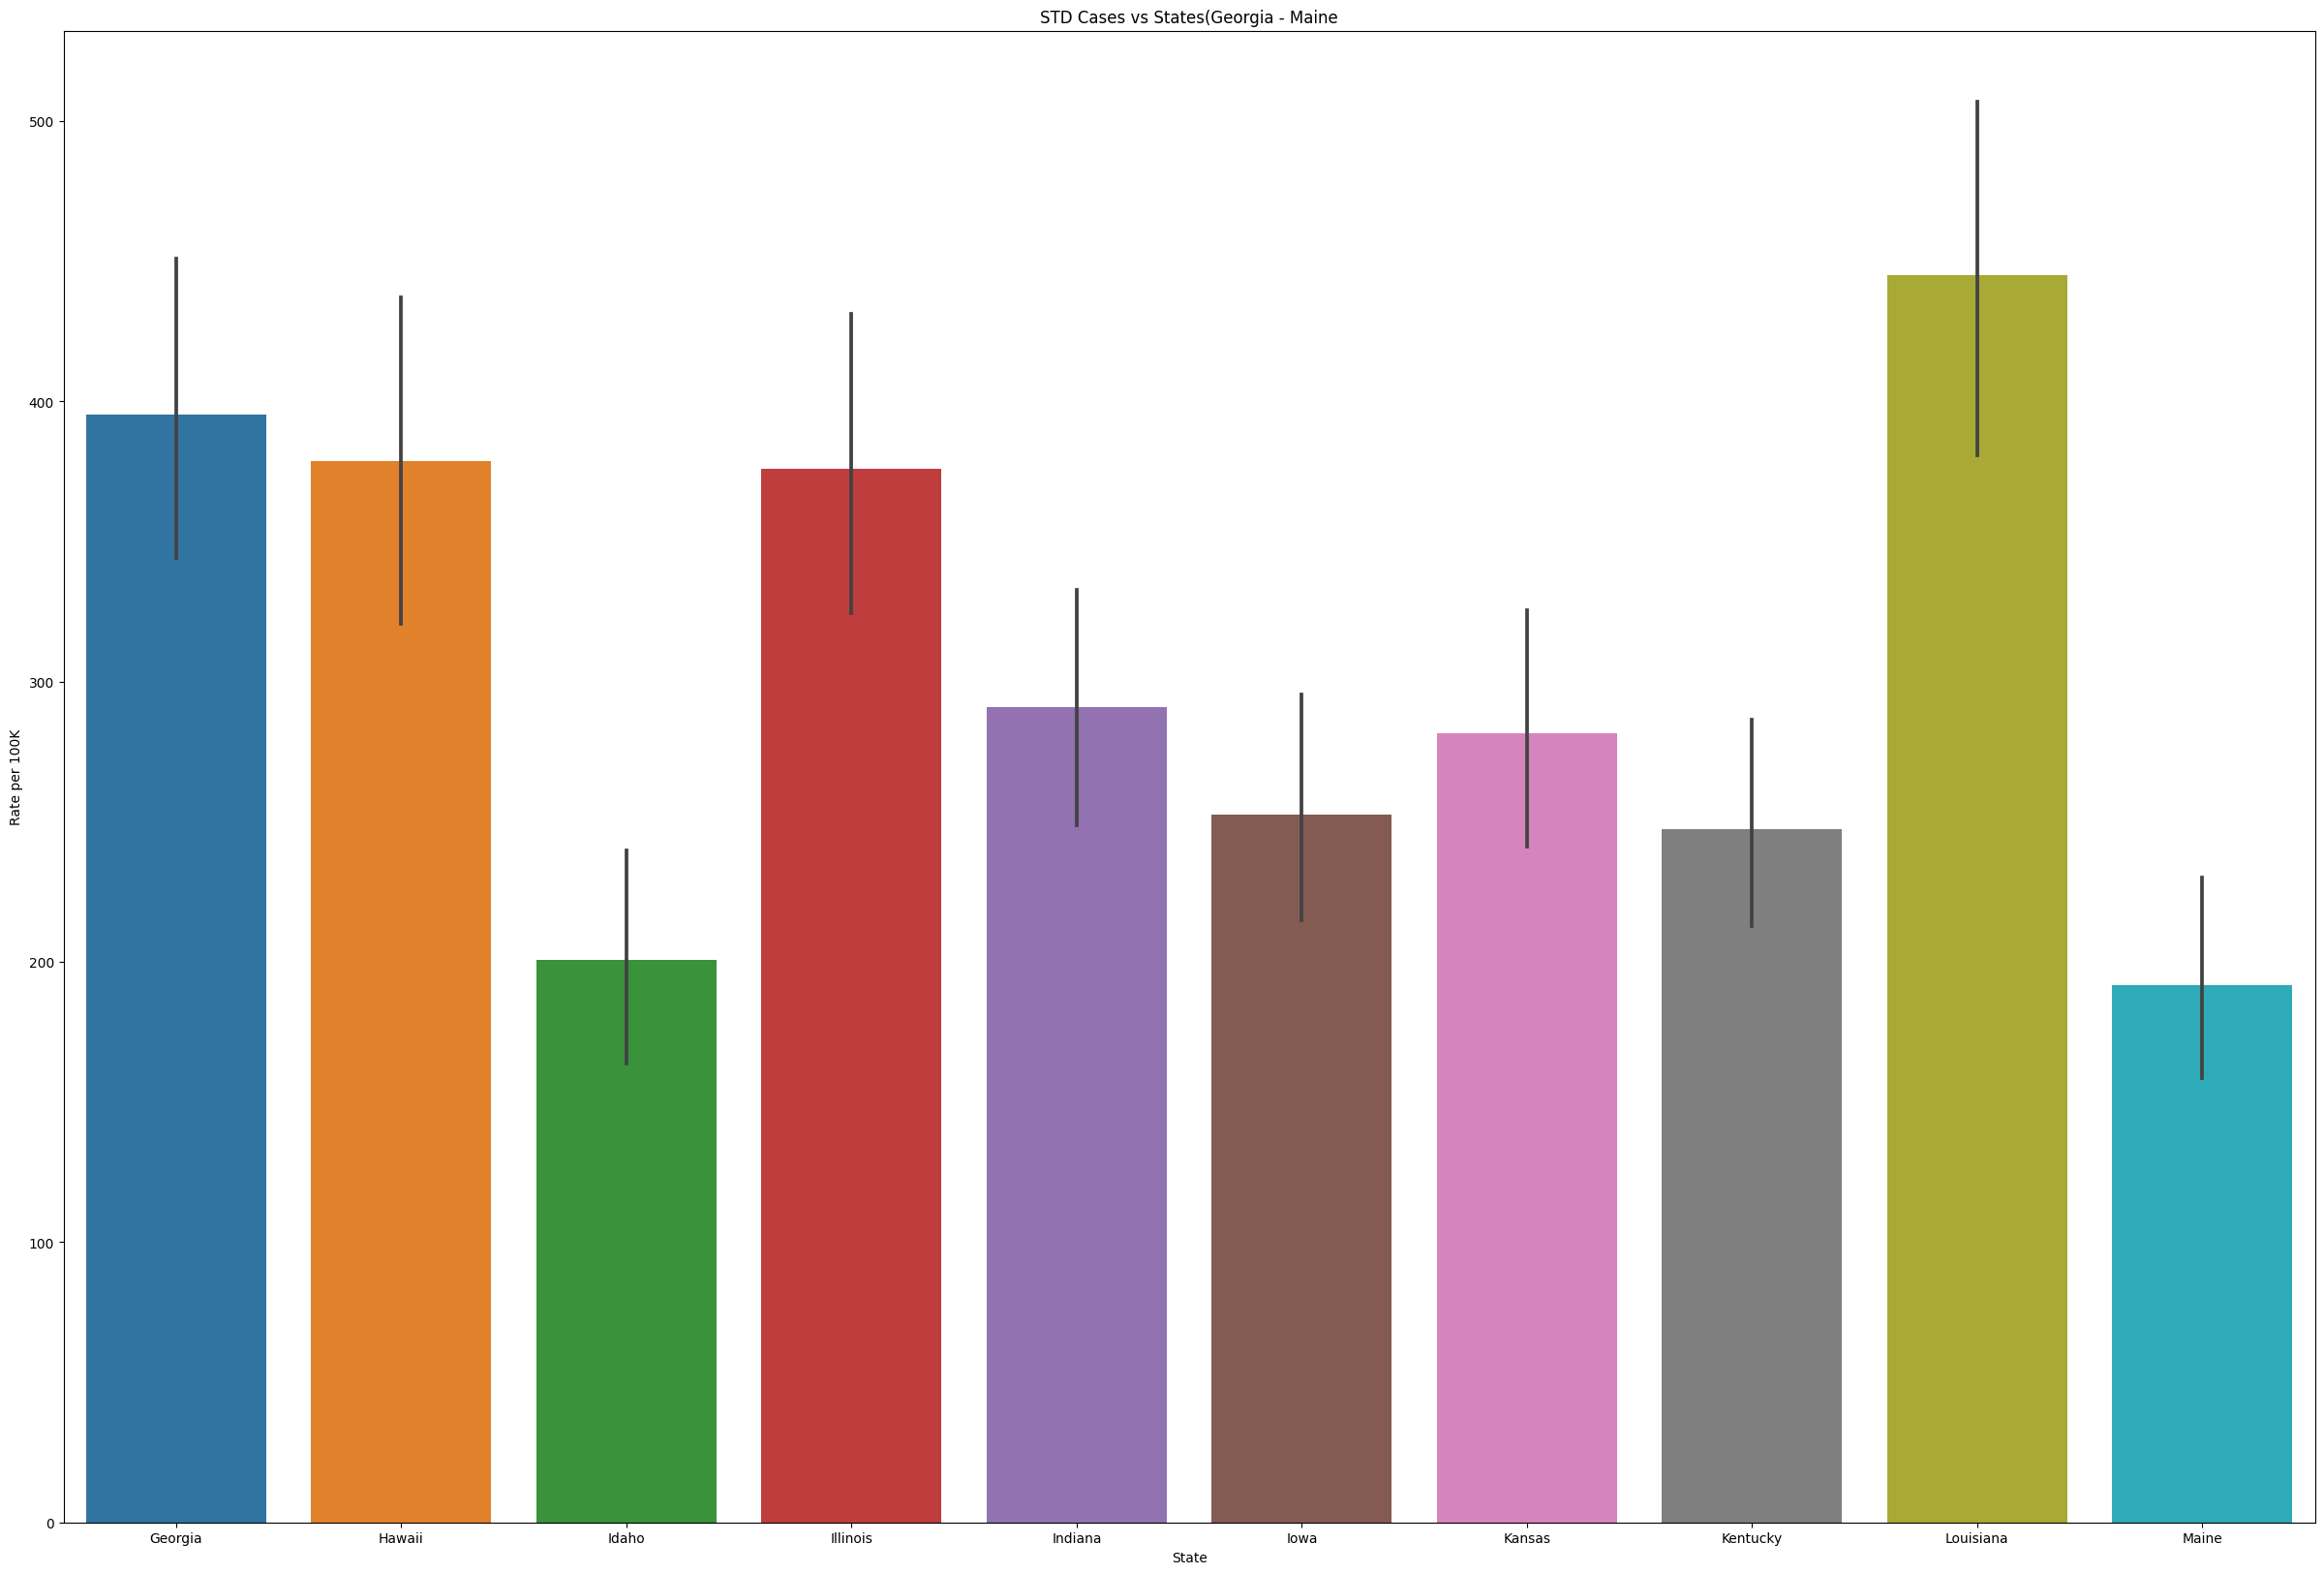

In [43]:
plt.figure(figsize = (30, 20))
sns.barplot(y = Rate_100k, x = States[7183:14125], data = std)
plt.title("STD Cases vs States(Georgia - Maine")

Text(0.5, 1.0, 'STD Cases vs States(Maryland - New Hampshire')

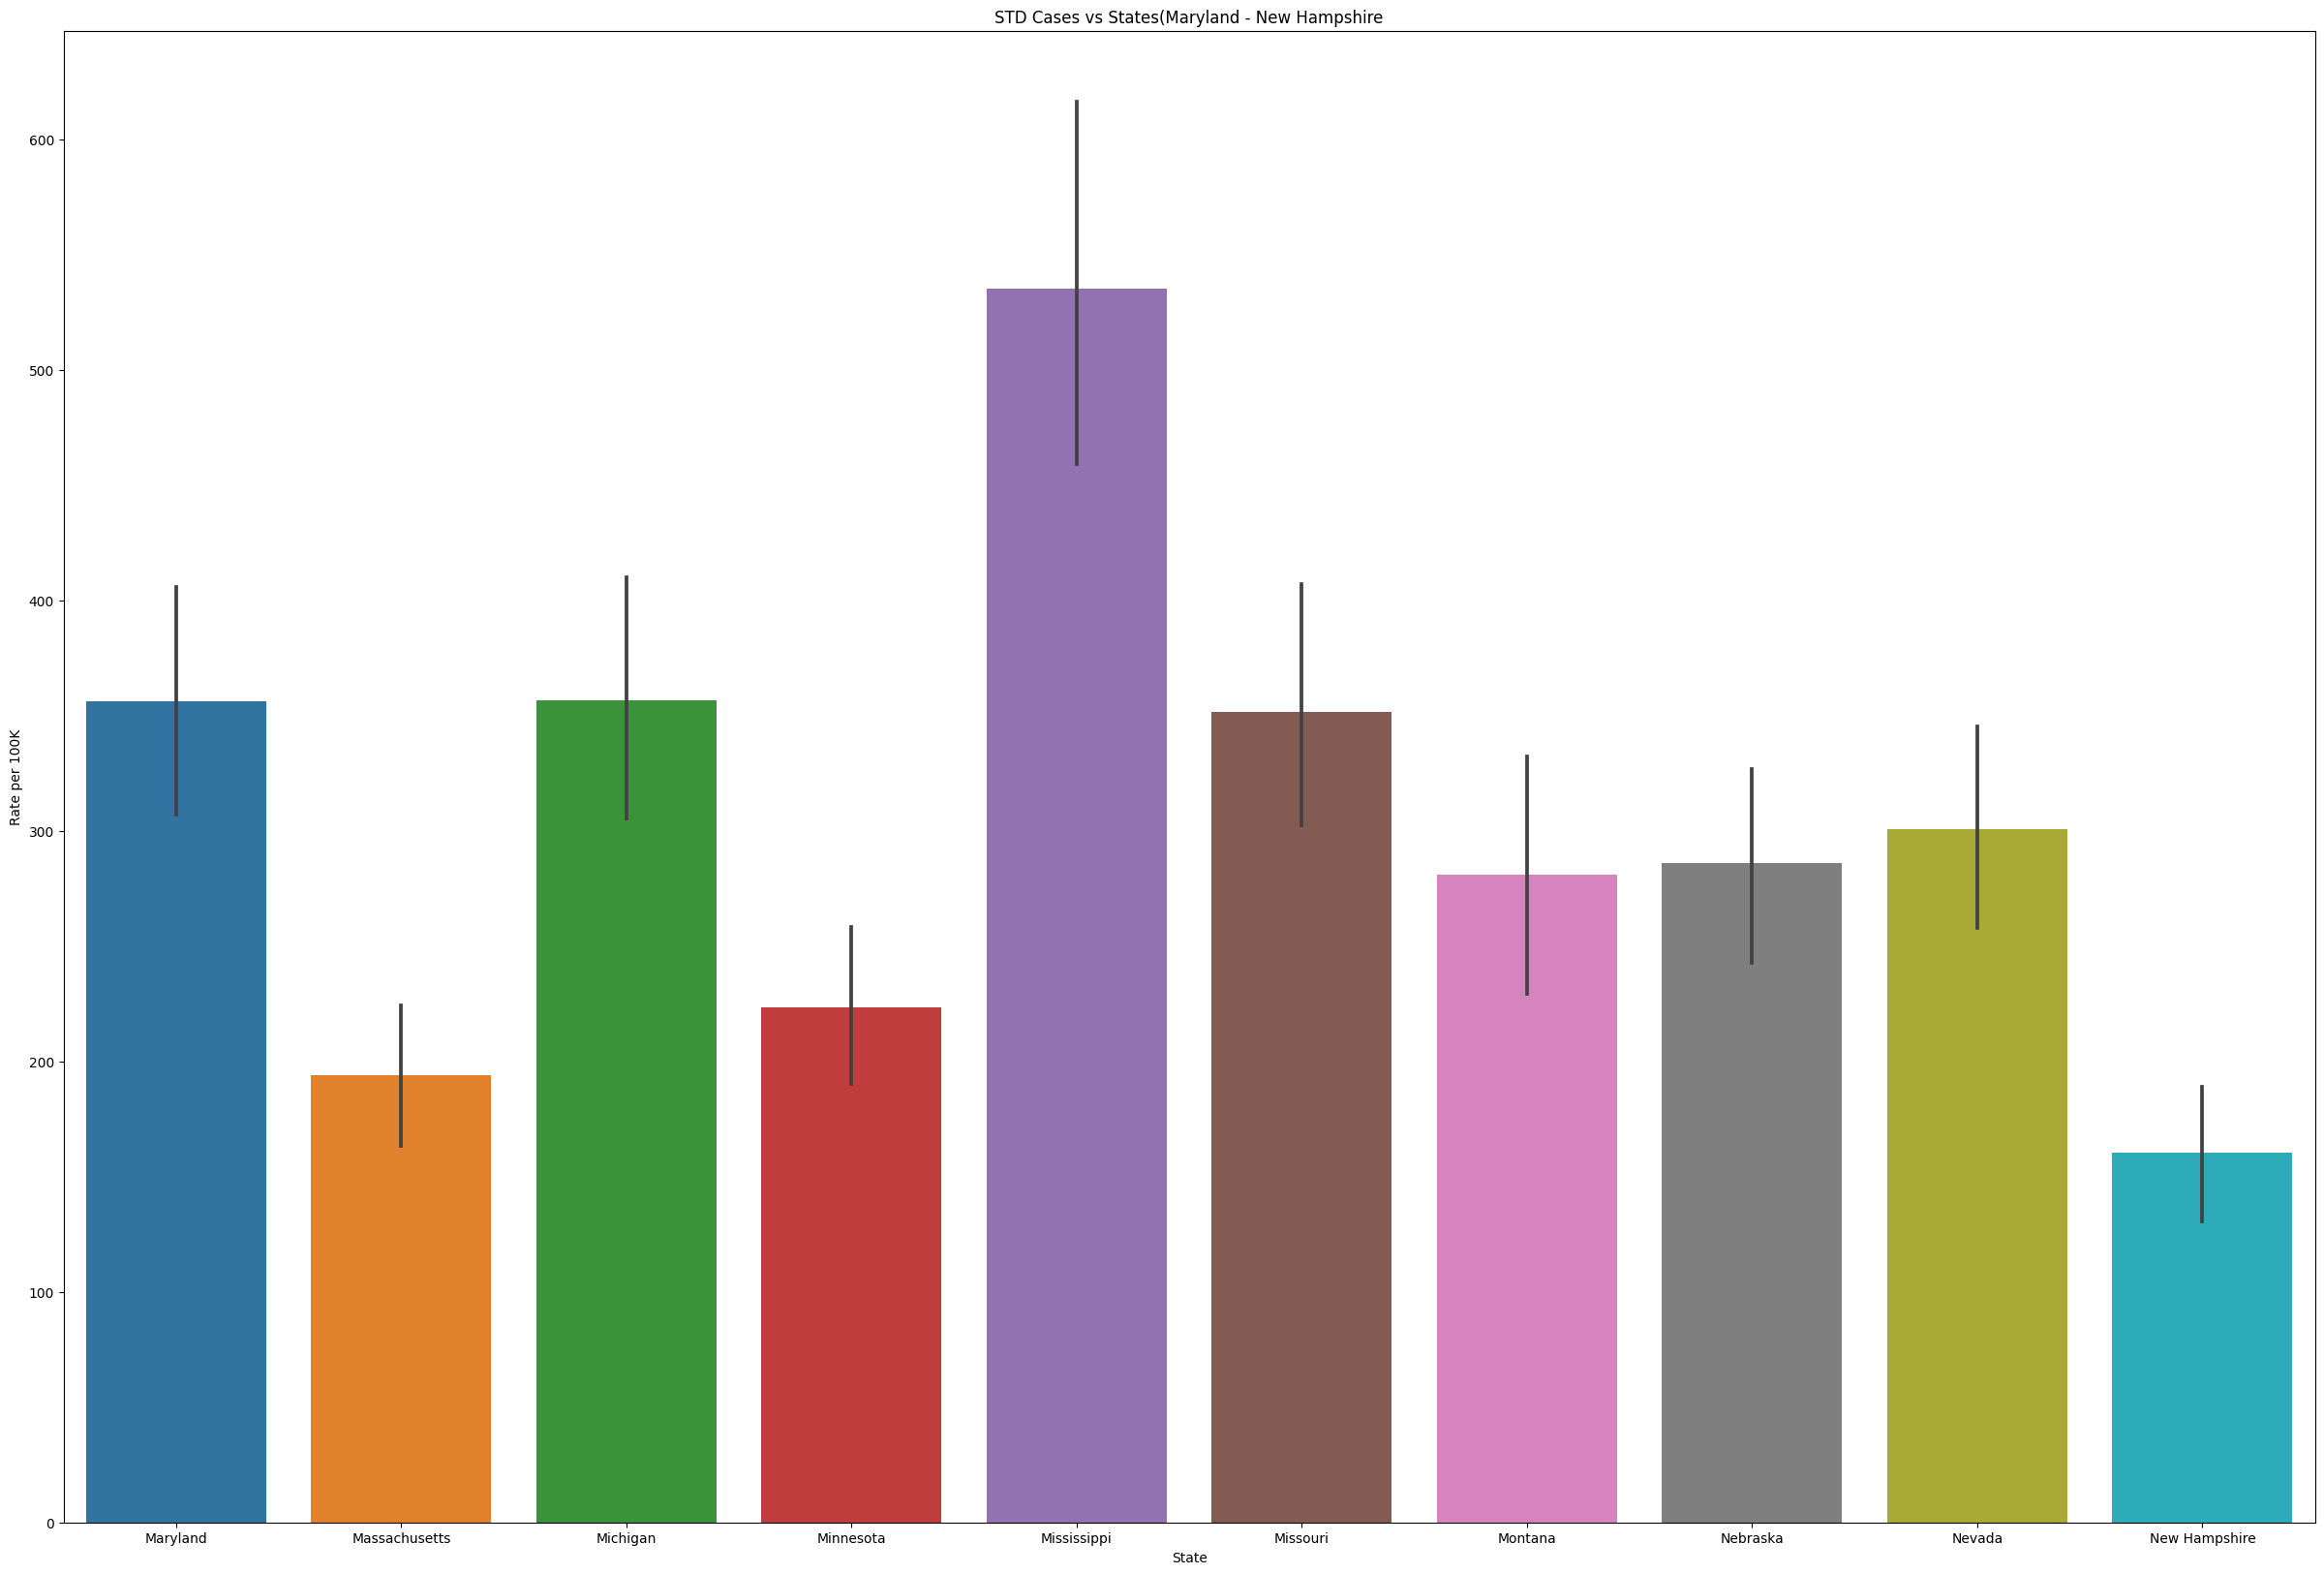

In [44]:
plt.figure(figsize = (30, 20))
sns.barplot(y = Rate_100k, x = States[14125:21044], data = std)
plt.title("STD Cases vs States(Maryland - New Hampshire")

Text(0.5, 1.0, 'STD Cases vs States(New Jersey - Rhode Island')

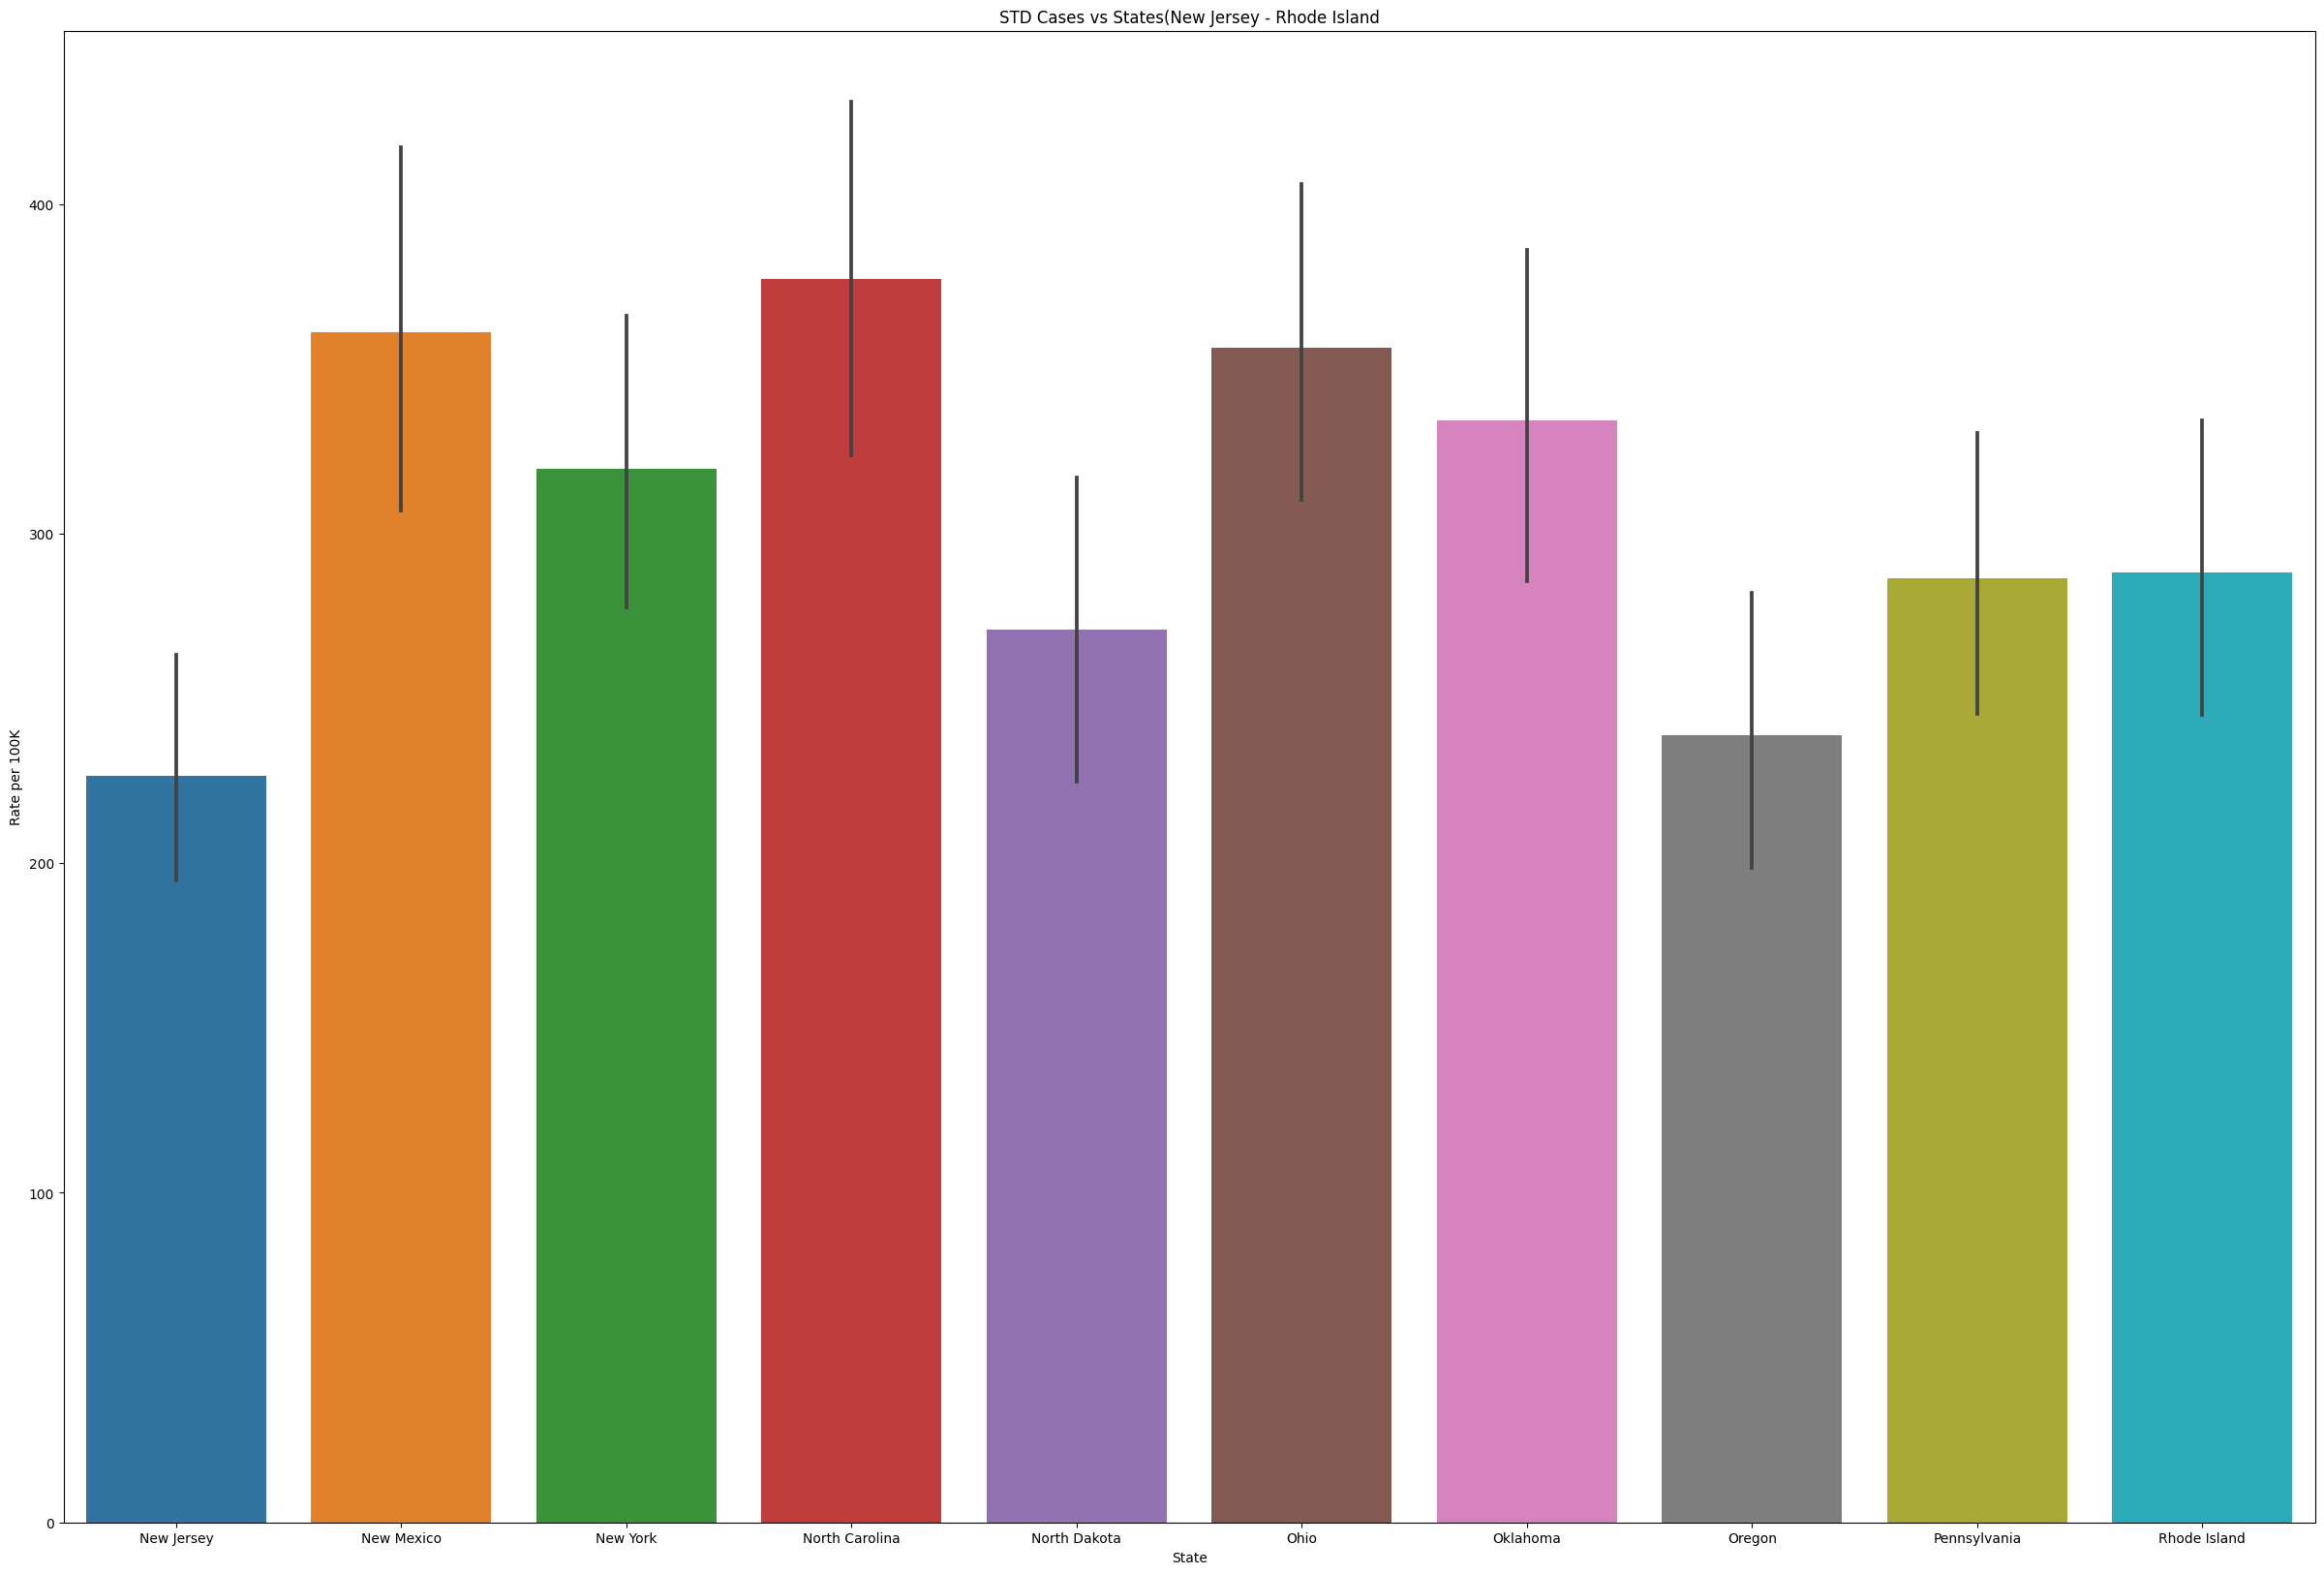

In [45]:
plt.figure(figsize = (30, 20))
sns.barplot(y = Rate_100k, x = States[21044:28174], data = std)
plt.title("STD Cases vs States(New Jersey - Rhode Island")

<function matplotlib.pyplot.bar_label(container, labels=None, *, fmt='%g', label_type='edge', padding=0, **kwargs)>

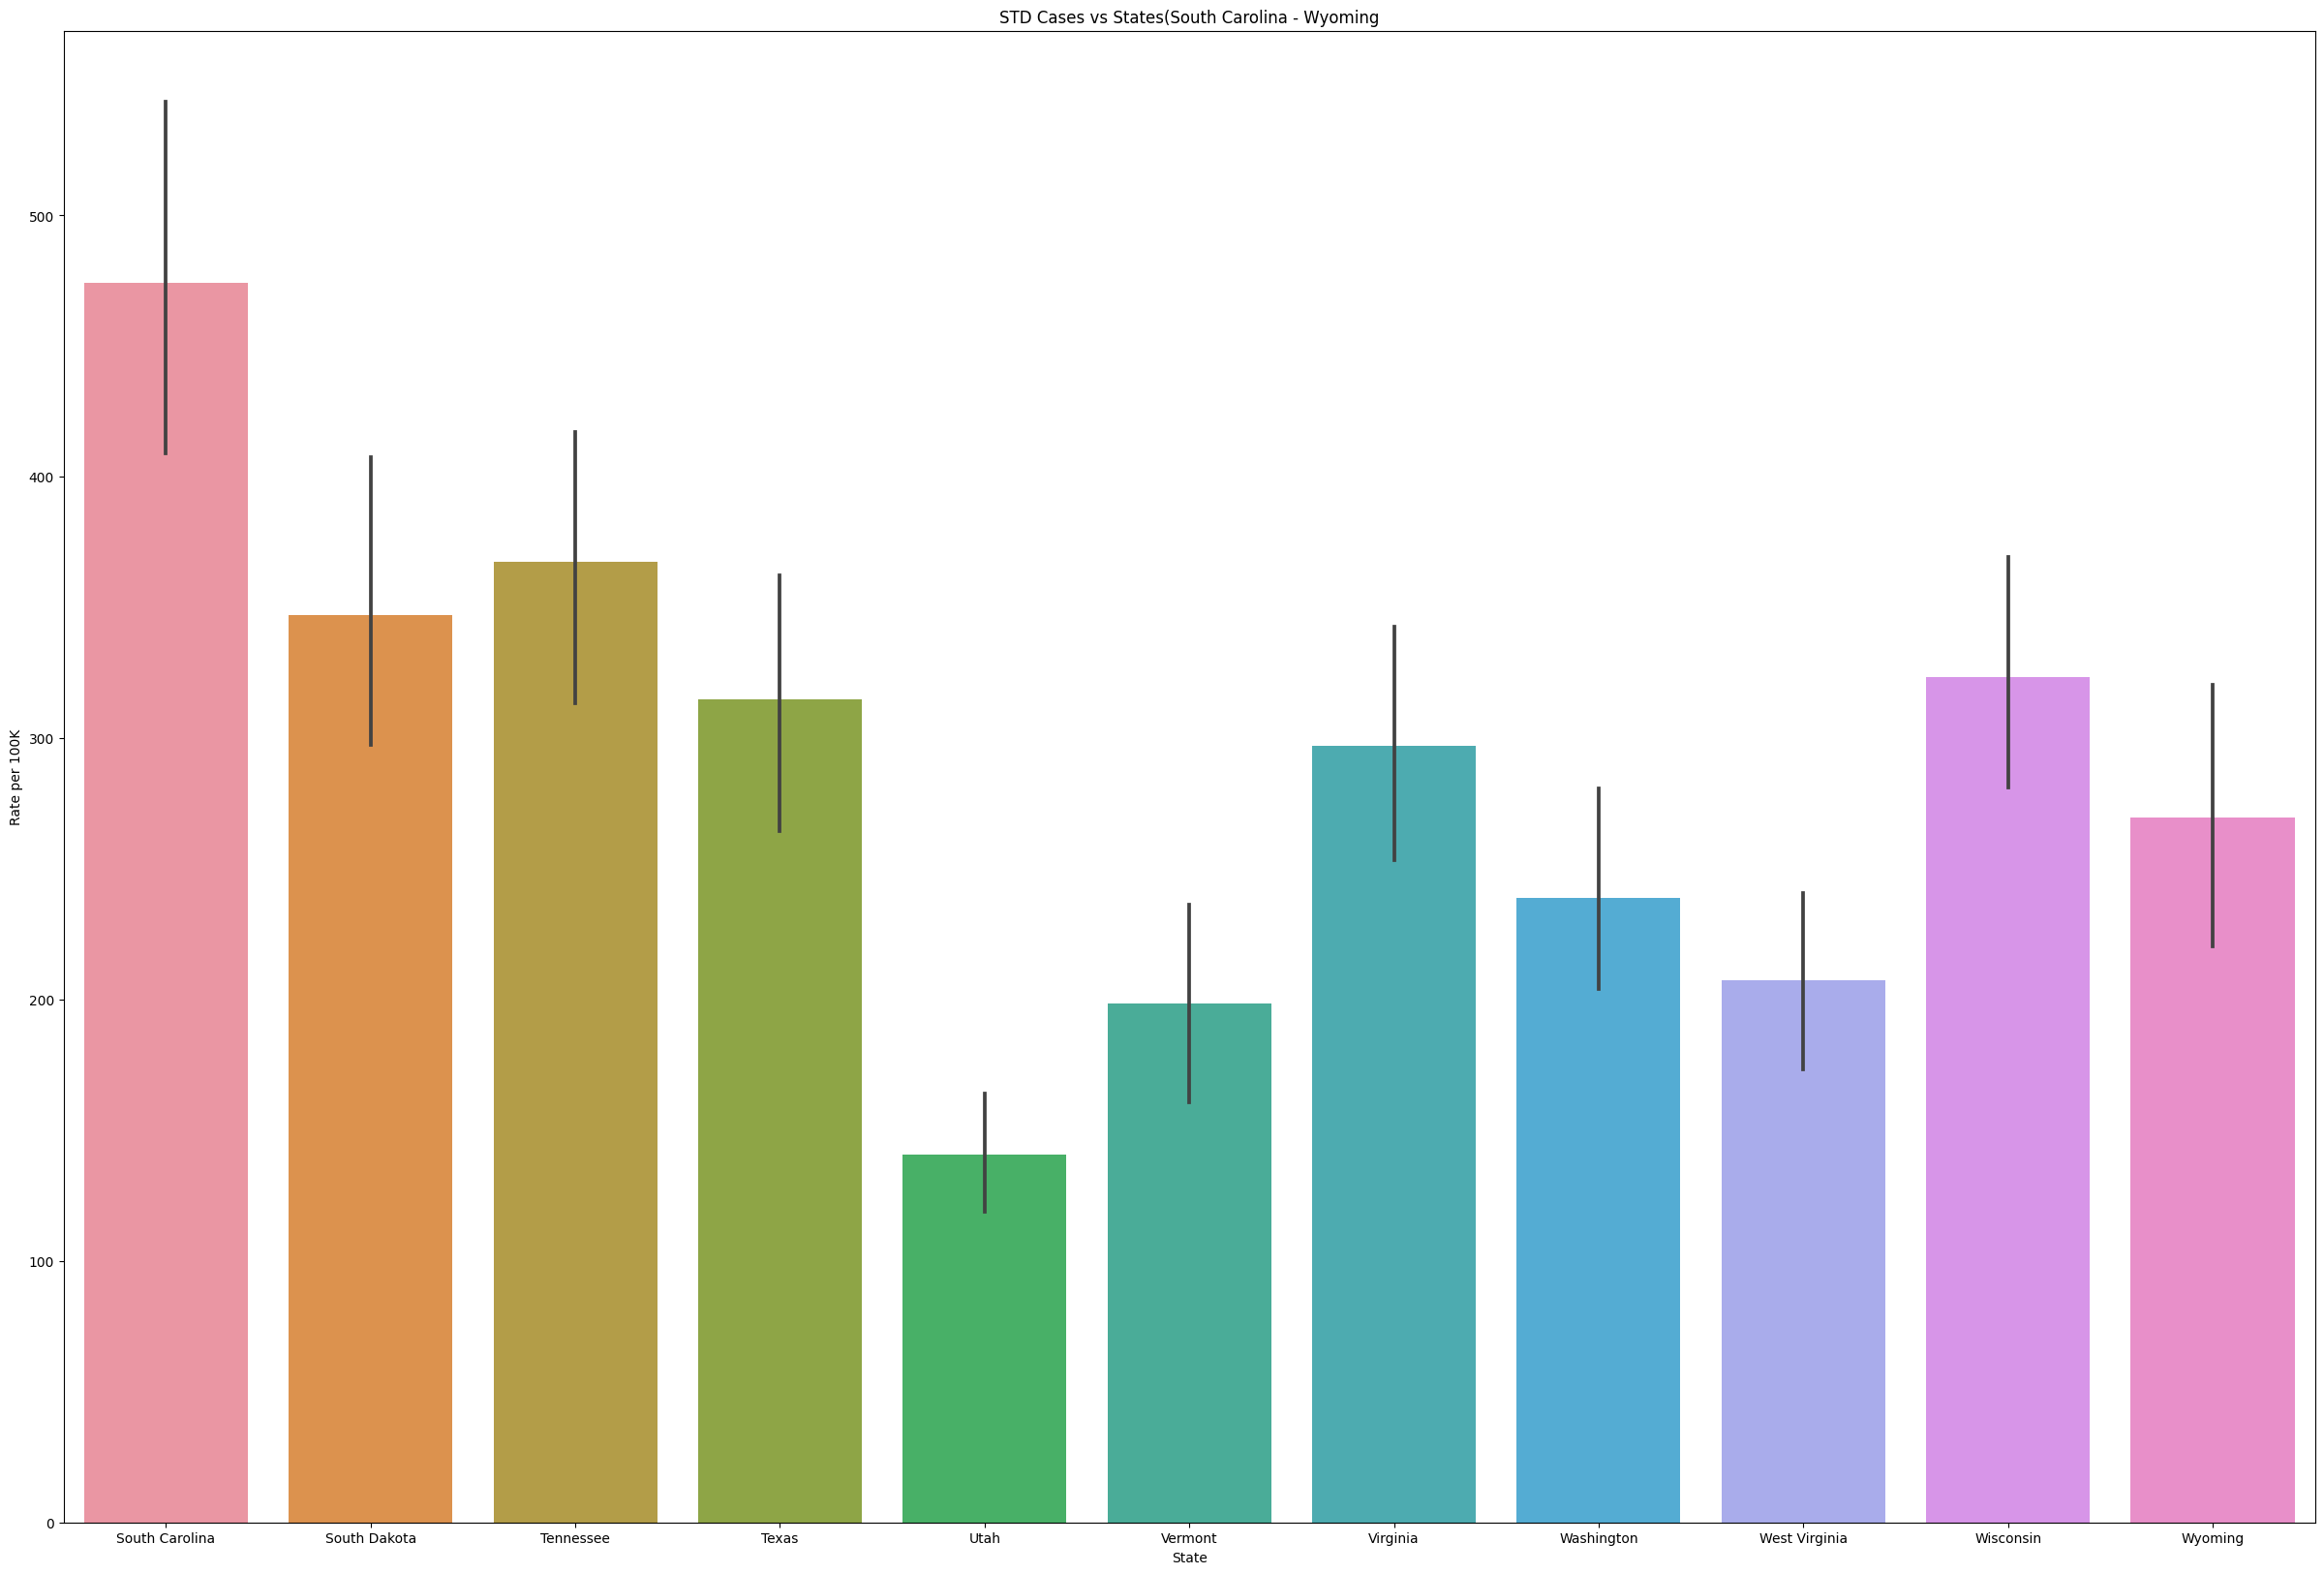

In [46]:
plt.figure(figsize = (30, 20))
sns.barplot(y = Rate_100k, x = States[28174:], data = std)
plt.title("STD Cases vs States(South Carolina - Wyoming")
plt.bar_label

Looking at these graphs, it is fairly obvious that State has atleast some impact on STD Rates. Somr states have rates past 800 per 100k while others are very low in the 100. This indicates that there is a significance in how states affect STD rates. Let us do the same thing with Gender and lets do some hypothesis testing with other variables later on to see if we should use certain variables in our future KNN model.

<function matplotlib.pyplot.bar_label(container, labels=None, *, fmt='%g', label_type='edge', padding=0, **kwargs)>

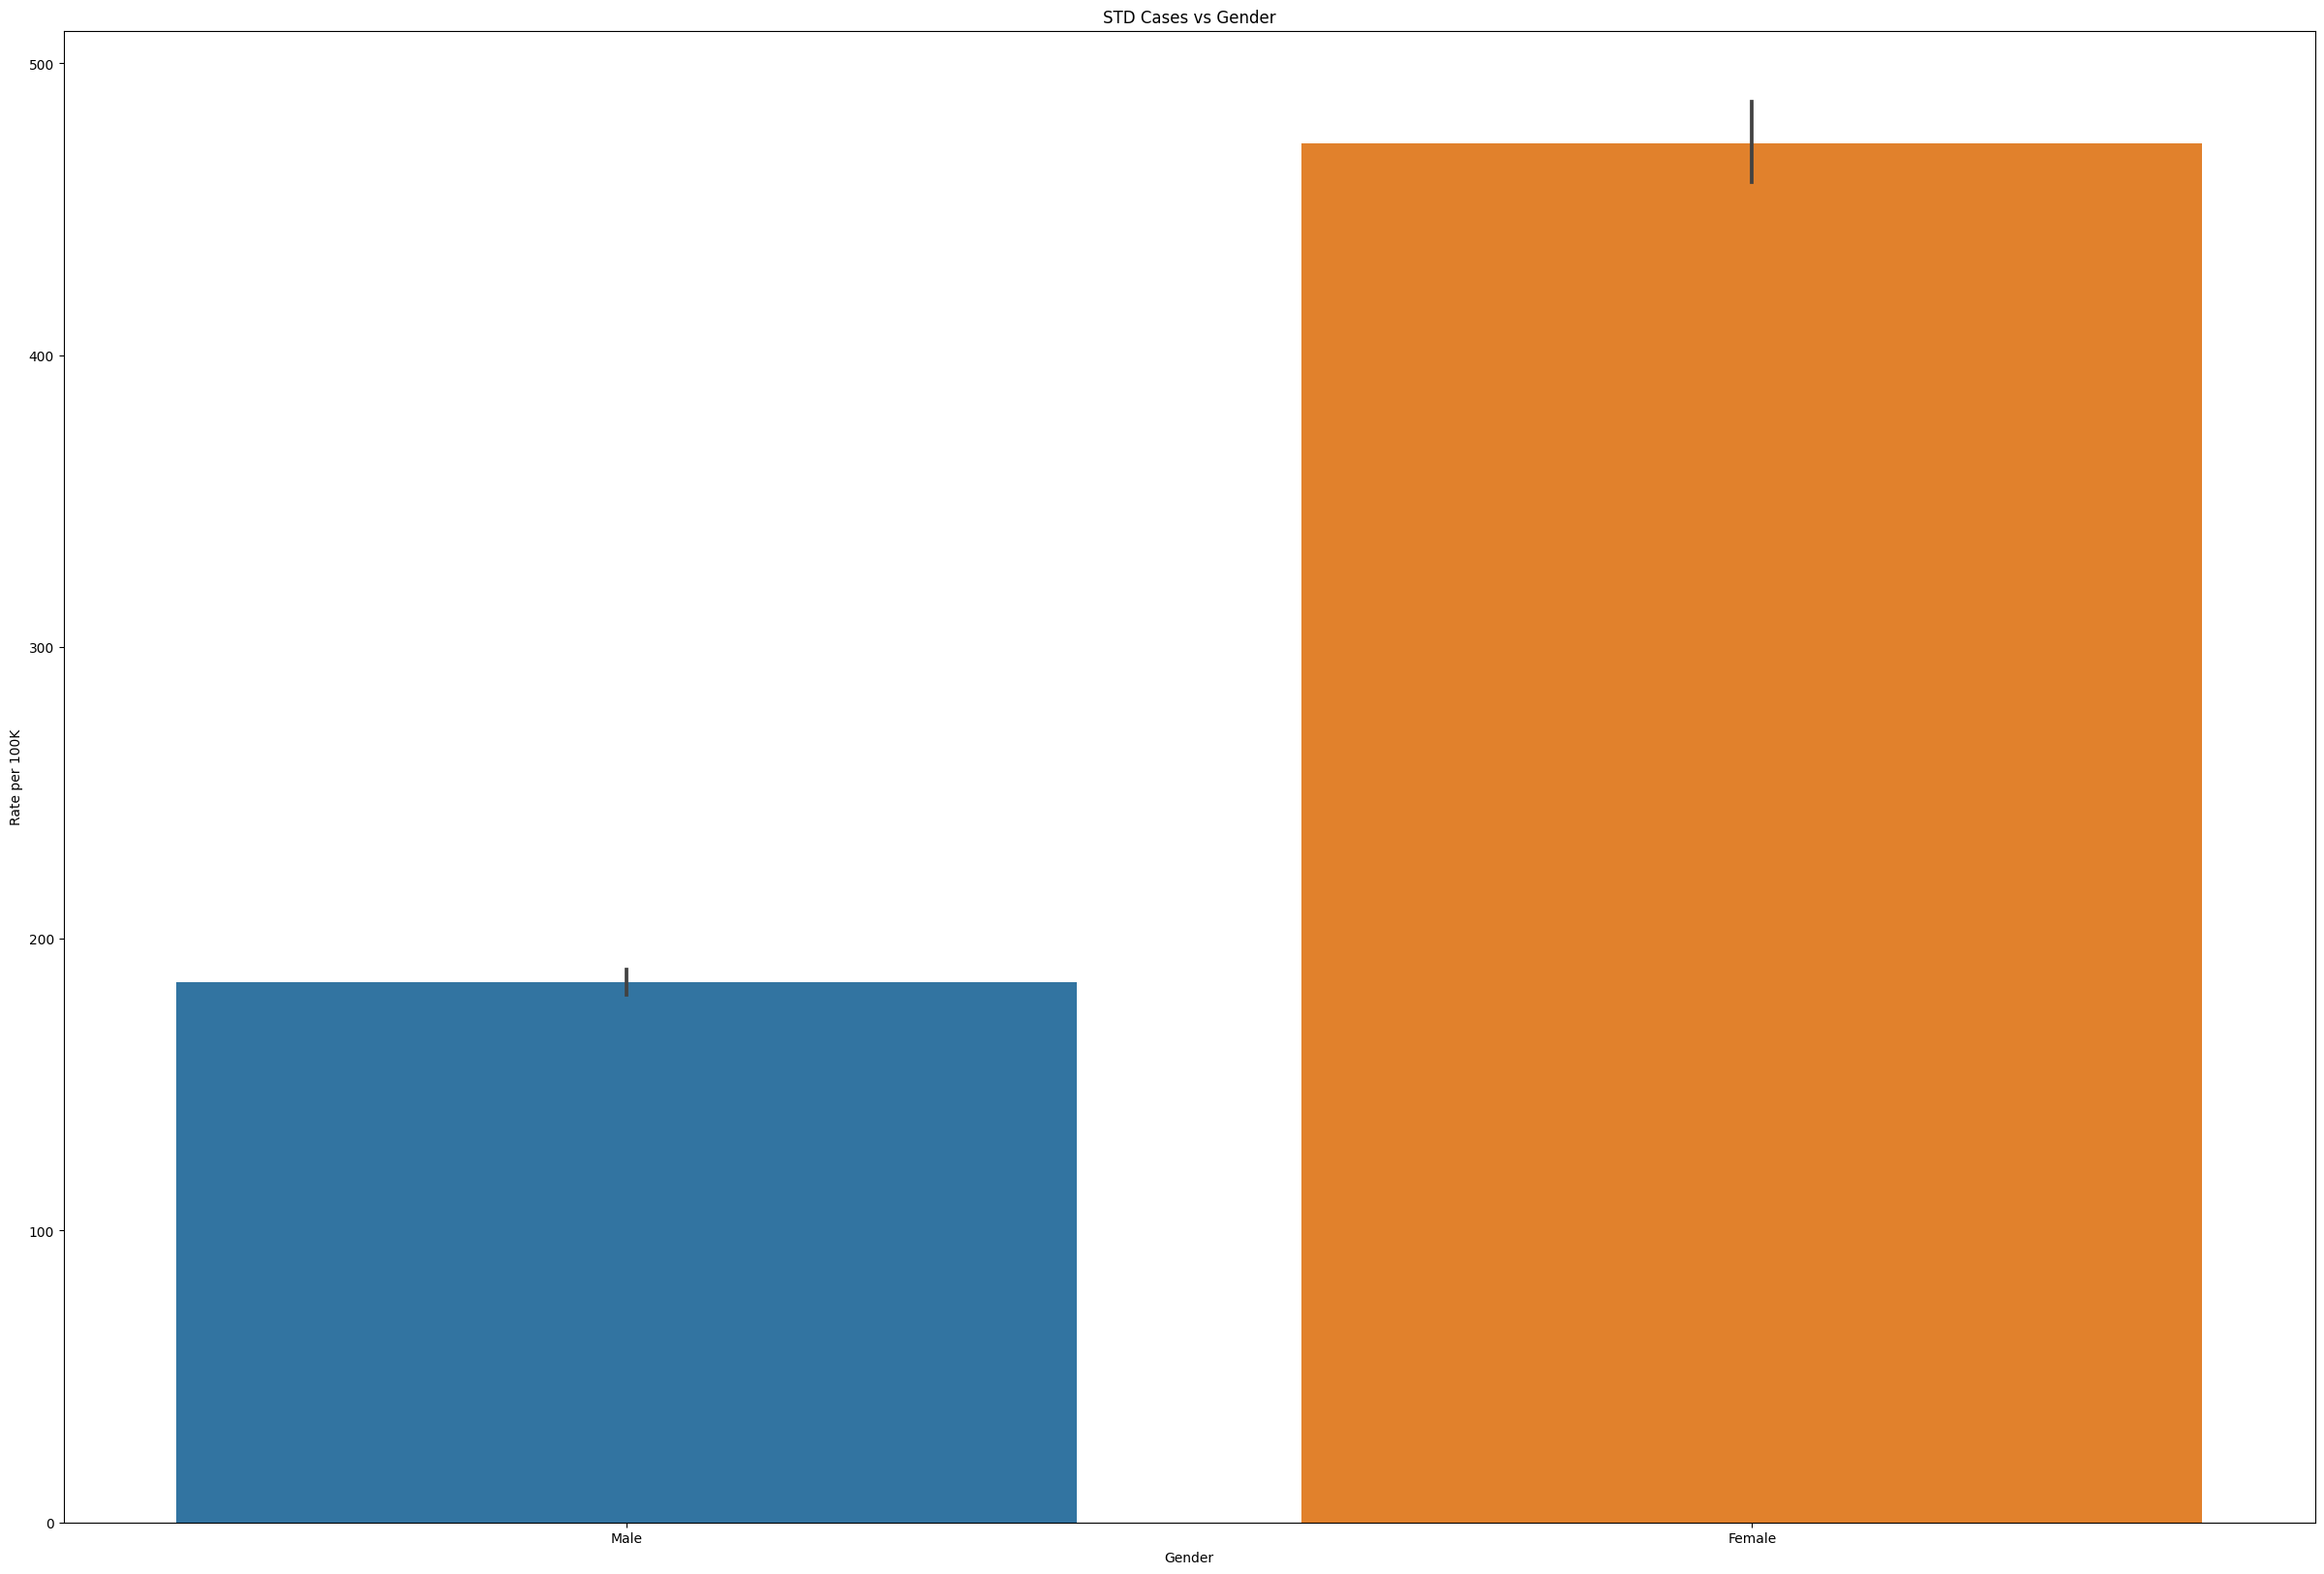

In [47]:
plt.figure(figsize = (30, 20))
sns.barplot(y = Rate_100k, x = Gender, data = std)
plt.title("STD Cases vs Gender")
plt.bar_label

Looking at the data here, it is fairly obvious that there is relationship between these two variables(gender and state) on respective STD rates. Females are significantly more likely to have an STD than males based on our analysis. Let us look at other factors too and see how much of an impact certain variables have on each other in our dataset.

<h4>Hypothesis Testing<h4>

A heatmap is a graphical representation of data where the values are represented as colors. It is a useful visualization tool for displaying the distribution and patterns of data across multiple variables. Heatmaps are often used to visualize the relationships between variables in a data set, and can be particularly useful for identifying correlations between variables.

In hypothesis testing, a heatmap can be used to visualize the relationship between two variables and help determine whether there is a significant association between them. If the variables are strongly correlated, the heatmap will show a strong pattern of colors, with similar colors appearing together in clusters. If the variables are not correlated, the heatmap will show a more random pattern of colors.

Heatmaps are particularly useful for hypothesis testing because they allow you to quickly and easily visualize the strength and direction of the relationship between two variables. This can help you determine whether the relationship between the variables is significant and whether it supports or refutes your hypothesis.

<AxesSubplot: >

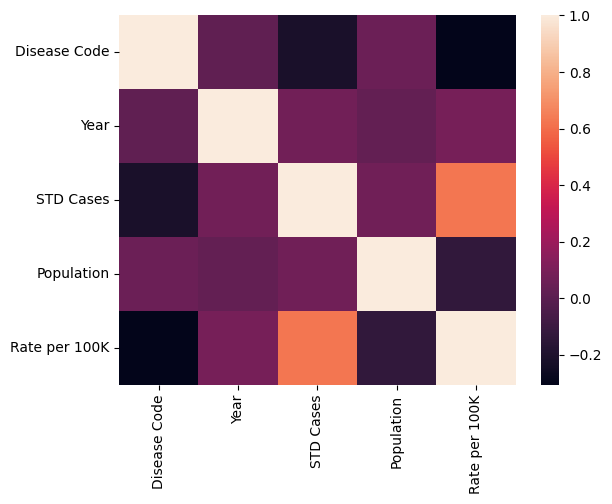

In [48]:
sns.heatmap(std.corr())

What's interesting here is the Disease Code, which is numerical correspondence to the type of STD(Chlamydia, Gonorrhea, Syphilis), which corresponds with the codes(274,280,310). What is interesting is that looking at the Heatmap, certain variables, such as year and population seem to have a correlation with the Disease Codes. The Heatmap here, is a good look at effect of quantiative variables on other quantitative variables, but let look at if State has an effect on STD type(both of these are categorical variables), like it did for STD rates. Using the heatmap above, we can clearly see that for Disease Code, there is a correlation with the other variables

Let use a chi-squared test for this approach.
The chi-squared test is a statistical test used to determine whether there is a significant association between two categorical variables. It is commonly used in hypothesis testing to assess whether two variables are independent or dependent.

The chi-squared test works by comparing the observed frequency of each category with the expected frequency, based on the assumption that the two variables are independent. If the observed and expected frequencies are similar, the test will conclude that there is no significant association between the variables. If the observed frequencies are significantly different from the expected frequencies, the test will conclude that there is a significant association between the variables.

The chi-squared test is useful in the relationship between two categorical variables because it allows you to determine whether there is a statistically significant association between the two variables. This is important because it allows you to determine whether the relationship between the variables is likely to be due to chance or whether it is a genuine and meaningful relationship.


The Null Hypothesis in this case is that STD type and State are independent

In [49]:
con = pd.crosstab(States, Diseases)
con

Disease,Chlamydia,Gonorrhea,Primary and Secondary Syphilis
State,,,
Alabama,266,266,240
Alaska,266,257,49
Arizona,266,266,228
Arkansas,266,266,232
California,266,266,244
Colorado,266,265,158
Connecticut,266,265,161
Delaware,238,265,143
District of Columbia,266,266,201


<AxesSubplot: xlabel='Disease', ylabel='State'>

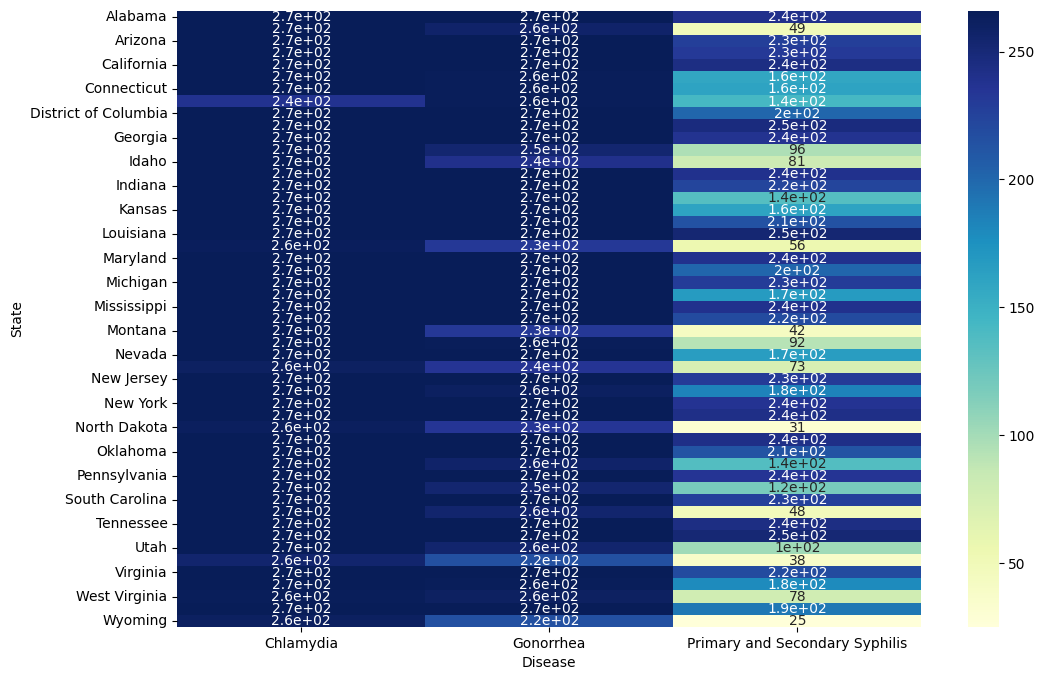

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(con, annot=True, cmap="YlGnBu")

That heatmap above provides further analysis in the role each state plays in its signigicance to the designated STD

In [51]:
import scipy.stats as stats
c, p, dof, expected = stats.chi2_contingency(con)
p

1.0708167765231239e-190

Since the p is so low(less than 0.05), we can reject the null and say that there is a relationship between State and STD type. Let us do the same type of testing for Year too.

In [52]:
con= pd.crosstab(Year, Diseases)
con

Disease,Chlamydia,Gonorrhea,Primary and Secondary Syphilis
Year,,,
1996.0,700,695,463
1997.0,698,700,445
1998.0,713,693,438
1999.0,712,692,432
2000.0,711,694,421
2001.0,711,692,433
2002.0,712,698,433
2003.0,713,700,444
2004.0,712,695,448


<AxesSubplot: xlabel='Disease', ylabel='Year'>

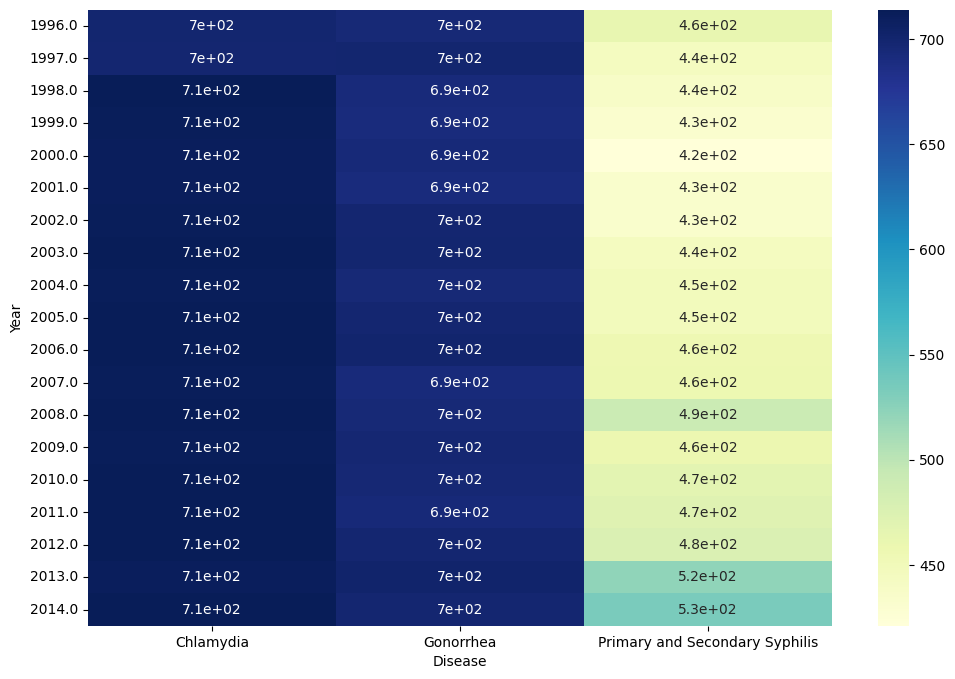

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(con, annot=True, cmap="YlGnBu")

In [54]:
c, p, dof, expected = stats.chi2_contingency(con)
p

0.9247563369550977

We accept the null in this case as the p is pretty high

<h4>LETS MAKE A CLASSIFIER :)<h4>

Lets use the previous heatmap and this information from our hypothesis testing to create a classifer to predict what type of STD someone could have. Let do this with a KNN. We have established that the columns(variables) through graphical and statistical analysis have a correlation with each other, with STD rates and STD type.

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression. It works by finding the K nearest data points to a given query point and using the class labels or output values of those data points to make a prediction for the query point.

KNN is often used to classify categorical variables because it does not make any assumptions about the underlying distribution of the data or the relationships between the features. Instead, it relies on the similarity between data points to make predictions. This makes it well-suited for handling categorical variables, which do not have a numerical meaning and cannot be compared using standard mathematical operations.

We can implement this through the use of the sklearn library fairly easily

In [55]:
std.head(50)
#Here we can see that a lot of our Data is Quantatative

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
index,,,,,,,,,,
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
23950,Chlamydia,274.0,Alabama,1998.0,Female,35-39 years,35-39,109.0,175869.0,61.98
23951,Chlamydia,274.0,Alabama,1998.0,Female,40+ years,40+,232.0,1025742.0,22.62
23952,Chlamydia,274.0,Alabama,1999.0,Female,0-14 years,0-14,326.0,452586.0,72.03
23953,Chlamydia,274.0,Alabama,1999.0,Female,15-19 years,15-19,4972.0,161690.0,3075.02
23954,Chlamydia,274.0,Alabama,1999.0,Female,20-24 years,20-24,4317.0,154634.0,2791.75
23955,Chlamydia,274.0,Alabama,1999.0,Female,25-29 years,25-29,1151.0,155151.0,741.86
23956,Chlamydia,274.0,Alabama,1999.0,Female,30-34 years,30-34,377.0,153099.0,246.25
23957,Chlamydia,274.0,Alabama,1999.0,Female,35-39 years,35-39,130.0,175011.0,74.28


Let us make certain features that we are using for input, quantitative. Lets assign code for State and Gender to make them numerical using our handy-dandy functions that I made. 

In [56]:
stateToCodes = {
    "Alabama": 1,
    "Alaska": 2,
    "Arizona": 3,
    "Arkansas": 4,
    "California": 5,
    "Colorado": 6,
    "Connecticut": 7,
    "Delaware": 8,
    "Florida": 9,
    "Georgia": 10,
    "Hawaii": 11,
    "Idaho": 12,
    "Illinois": 13,
    "Indiana": 14,
    "Iowa": 15,
    "Kansas": 16,
    "Kentucky": 17,
    "Louisiana": 18,
    "Maine": 19,
    "Maryland": 20,
    "Massachusetts": 21,
    "Michigan": 22,
    "Minnesota": 23,
    "Mississippi": 24,
    "Missouri": 25,
    "Montana": 26,
    "Nebraska": 27,
    "Nevada": 28,
    "New Hampshire": 29,
    "New Jersey": 30,
    "New Mexico": 31,
    "New York": 32,
    "North Carolina": 33,
    "North Dakota": 34,
    "Ohio": 35,
    "Oklahoma": 36,
    "Oregon": 37,
    "Pennsylvania": 38,
    "Rhode Island": 39,
    "South Carolina": 40,
    "South Dakota":41,
    "Tennessee": 42,
    "Texas": 43,
    "Utah": 44,
    "Vermont": 45,
    "Virginia": 46,
    "Washington": 47,
    "West Virginia": 48,
    "Wisconsin": 49,
    "Wyoming": 50,
    "District of Columbia": 51
}
genderTocodes = {
    "Male" : 1,
    "Female" : 2
}

In [57]:
def stateToCode(df):
    df["State"] = df["State"].replace(stateToCodes.keys(),stateToCodes.values())
def genderToCode(df):
    df["Gender"]= df["Gender"].replace(genderTocodes.keys(),genderTocodes.values())
stateToCode(std)
genderToCode(std)
std.drop('Age Code', axis=1, inplace=True)
std.drop('Age', axis=1, inplace=True)

std.head()

,Disease,Disease Code,State,Year,Gender,STD Cases,Population,Rate per 100K
index,,,,,,,,
0,Chlamydia,274.0,1,1996.0,1,25.0,468394.0,5.34
23950,Chlamydia,274.0,1,1998.0,2,109.0,175869.0,61.98
23951,Chlamydia,274.0,1,1998.0,2,232.0,1025742.0,22.62
23952,Chlamydia,274.0,1,1999.0,2,326.0,452586.0,72.03
23953,Chlamydia,274.0,1,1999.0,2,4972.0,161690.0,3075.02


Let us construct our model with our Data by using the sklearn library. Lets use 80% of the data for classification purpose and 20% for testing. We can then make a confusion matrix to then assertain the accuracy of our model as well.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
#Seperate our training and testing variables
X = std.iloc[:, 2:-1].values
y = std.iloc[:, 1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 



#Make the Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
#get prediction
y_predict = classifier.predict(X_test)

# Print out results with a report and classification matrix 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


[[1227 1138  252]
 [1175 1148  366]
 [ 431  488  872]]
              precision    recall  f1-score   support

       274.0       0.43      0.47      0.45      2617
       280.0       0.41      0.43      0.42      2689
       310.0       0.59      0.49      0.53      1791

    accuracy                           0.46      7097
   macro avg       0.48      0.46      0.47      7097
weighted avg       0.46      0.46      0.46      7097



Precision, recall, and the F1 score are all evaluation metrics that are commonly used to assess the performance of a classification model, including a KNN model.

Precision is a measure of the number of true positive predictions made by the model compared to the total number of positive predictions. It is calculated as the number of true positives divided by the sum of the true positives and false positives. High precision indicates that the model is good at identifying positive cases, but it may also be prone to missing positive cases.

Recall is a measure of the number of true positive predictions made by the model compared to the total number of actual positive cases. It is calculated as the number of true positives divided by the sum of the true positives and false negatives. High recall indicates that the model is good at finding all of the positive cases, but it may also be prone to making false positive predictions.

The F1 score is a weighted average of precision and recall, and it is calculated as the harmonic mean of precision and recall. The F1 score is a useful metric when you want to balance precision and recall, and it is often used as a single measure of model performance.
Here we can see that the Precision accuracy is 0.47, the Recall is 0.46 and f1 is 0.47 with a total esitmated accuracy around 46-47%. 

Although this is not terribly accurate, this is a useful tool in the aid of in classification in the type of STD for STD oriented Data Scientists like ourselves. With further feature engineering and more data, a way that this project could be continued is increasing the classification accurary futher as well as with a more complicated and robust model as a KNN is quite simple. To be fair, this is a decent accurary, given the quality of data, features being used and the relative simplicity of the model.

<h4>Conclusion<h4>

In this project, machine learning and data science techniques were used to analyze the STD data in order to identify patterns and trends in STD rates over time and among different populations. This information was used to develop targeted prevention strategies and interventions aimed at reducing STD rates.

Some possible machine learning techniques that were used in this project included classification algorithms, which were used to predict the likelihood of an individual contracting an STD based on their demographic characteristics, or clustering algorithms, which were used to identify groups of individuals with similar characteristics and high risk of contracting an STD.

Data preprocessing and cleaning were important steps in this project because they ensured that the data was in a usable and consistent format for analysis and modeling. This may have involved handling missing values, dealing with inconsistencies in the data, and transforming the data into a format that was suitable for the machine learning algorithms being used.

Once the data had been cleaned and prepared, data visualization techniques were used to explore and understand the data, identify trends and patterns, and gain insights into the data. This may have involved creating plots and charts to visualize the data, or using statistical techniques to analyze the data.

Overall, the use of machine learning and data science techniques in this project helped to prevent the spread of STDs by identifying high-risk individuals and areas, and developing targeted prevention strategies based on the analysis of STD data and then the ML model made was used to indenitfy what STD a certain person has.